In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from IPython.display import display


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')
sns_color = sns.color_palette('pastel')[0:5]

In [2]:
# 데이터 불러오기
regular_season_day = pd.read_csv('../datas/Regular_Season_Batter_Day_by_Day_b4.csv')
display(regular_season_day.head())

'''
매일의 데이터를 가지고 있다.
avg1은 해당 날짜의 타율, avg2는 총 타율을 의미한다.
opposing_team은 당시 상대팀을 의미한다.
''';

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [3]:
'''
date 열을 month, day로 분리한다.
'''

regular_season_day['month'] = regular_season_day['date'].apply(lambda x: str(x).split('.')[0]) # 월
regular_season_day['day'] = regular_season_day['date'].apply(lambda x: str(x).split('.')[1])   # 일

In [4]:
# 연도, 월별 타율 평균을 계산
month_avg = regular_season_day.groupby(['year', 'month'])['avg2'].mean().reset_index()
month_avg_pivot = month_avg.pivot_table(index=['month'], columns=['year'], values=['avg2'])
display(month_avg_pivot)

'''
3월달과 10월달에만 결측치가 있는데, 이것은 3월에 시즌이 시작되고 10월쯤 시즌이 끝나기 때문에 있는 것 같다.
각 연도마다 시작과 끝 일정이 다르기 때문에 나타났다.    
''';

avg2                                                              \
year       2001      2002      2003      2004      2005      2006      2007   
month                                                                         
10     0.356400  0.269065  0.216583  0.203636       NaN  0.260985  0.249888   
3           NaN       NaN       NaN       NaN       NaN  0.261714  0.261714   
4      0.205217  0.319792  0.250296  0.259663  0.235317  0.267106  0.215703   
5      0.297157  0.267990  0.241491  0.237954  0.253527  0.264283  0.237329   
6      0.306926  0.275867  0.252290  0.248800  0.249913  0.264392  0.260600   
7      0.293171  0.266650  0.244230  0.251973  0.256396  0.262464  0.259171   
8      0.303489  0.270481  0.252319  0.249460  0.243570  0.265369  0.270258   
9      0.308636  0.248333  0.243780  0.203953  0.237058  0.258794  0.251022   

                                                                             \
year       2008      2009      2010      2011      2012      2013      2014   
month                                                                         
10     0.249638  0.033333       NaN  0.243526  0.246949  0.257841  0.273537   
3      0.271982       NaN  0.239861       NaN       NaN  0.231236  0.210598   
4      0.261531  0.252546  0.262953  0.247133  0.234199  0.267994  0.259918   
5      0.262535  0.280842  0.272934  0.250877  0.247844  0.268355  0.273899   
6      0.270766  0.278781  0.274791  0.263264  0.254577  0.270533  0.283480   
7      0.264870  0.275054  0.265501  0.264829  0.261513  0.262812  0.275677   
8      0.265173  0.271796  0.271075  0.262048  0.258069  0.268122  0.282025   
9      0.252942  0.264468  0.265312  0.258500  0.251232  0.260571  0.272411   

                                               
year       2015      2016      2017      2018  
month                                          
10     0.274042  0.282547  0.280289  0.277482  
3      0.214485  0.257857  0.161979  0.238015  
4      0.255175  0.266711  0.259430  0.263953  
5      0.261307  0.275240  0.274374  0.274083  
6      0.268999  0.276307  0.279060  0.280630  
7      0.272685  0.283192  0.284565  0.280817  
8      0.272377  0.283105  0.283283  0.283923  
9      0.271629  0.276513  0.273213  0.277841

7     5
8     3
4     3
6     3
10    2
3     1
5     1
Name: count, dtype: int64


{3: 1, 4: 3, 5: 1, 6: 3, 7: 5, 8: 3, 10: 2}

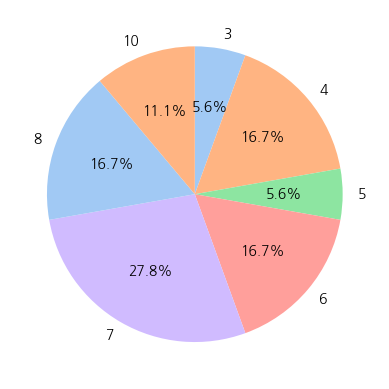

In [5]:
# 시각화 해보기

'''
가장 높은 타율을 기록한 횟수가 가장 많은 달을 구해보려고 한다.

파이차트로 그려보려고 한다.
'''

# 각 연도별 타율이 가장 높은 달 추출
best_avg_month = month_avg_pivot.idxmax().value_counts()
print(best_avg_month)

# key값 int로 변경
best_avg_month = {int(key): value for key, value in best_avg_month.to_dict().items()}

# 정렬
best_avg_month = dict(sorted(best_avg_month.items()))
display(best_avg_month)

best_avg_month_label = best_avg_month.keys()
best_avg_month_value = best_avg_month.values()

# 파이 그래프 그리기
'''
startangle: 시작 기점(90 = 12시 방향)
counterclock: 어느 방향으로 데이터가 나열될 것인가(False = 시계 방향)
'''
plt.pie(best_avg_month_value, labels=best_avg_month_label, autopct='%.1f%%', startangle=90, colors=sns_color, counterclock=False)
plt.show()

In [6]:
# 연도별 평균타울 순위 매기기

# 연도별 평균
month_avg_rank_label = month_avg_pivot.mean().sort_values(ascending=False)[:3].index.get_level_values(1).to_numpy()
month_avg_rank_value = month_avg_pivot.mean().sort_values(ascending=False)[:3].values

print('평균 타율 순위')
for idx, (label, value) in enumerate(zip(month_avg_rank_label, month_avg_rank_value)):
    print(f'{idx+1}st. {label}년: {value:.3f}')

print('----------')
    

# 각 월별로 타율이 가장 높은 연도

month_best_avg_year = month_avg_pivot.idxmax()
month_best_avg_value = month_avg_pivot.max()

display(pd.DataFrame({
    '최고 타율 연도': month_best_avg_year.map(lambda x: x+'월'),
    '타율': month_best_avg_value
}).droplevel(0))


평균 타율 순위
1st. 2001년: 0.296
2st. 2016년: 0.275
3st. 2002년: 0.274
----------


,최고 타율 연도,타율
year,,
2001,10월,0.356400
2002,4월,0.319792
2003,8월,0.252319
2004,4월,0.259663
2005,7월,0.256396
2006,4월,0.267106
2007,8월,0.270258
2008,3월,0.271982
2009,5월,0.280842


avg2                                                              \
year       2001      2002      2003      2004      2005      2006      2007   
month                                                                         
4      0.205217  0.319792  0.250296  0.259663  0.235317  0.267106  0.215703   
5      0.297157  0.267990  0.241491  0.237954  0.253527  0.264283  0.237329   
6      0.306926  0.275867  0.252290  0.248800  0.249913  0.264392  0.260600   
7      0.293171  0.266650  0.244230  0.251973  0.256396  0.262464  0.259171   
8      0.303489  0.270481  0.252319  0.249460  0.243570  0.265369  0.270258   
9      0.308636  0.248333  0.243780  0.203953  0.237058  0.258794  0.251022   

                                                                             \
year       2008      2009      2010      2011      2012      2013      2014   
month                                                                         
4      0.261531  0.252546  0.262953  0.247133  0.234199  0.267994  0.259918   
5      0.262535  0.280842  0.272934  0.250877  0.247844  0.268355  0.273899   
6      0.270766  0.278781  0.274791  0.263264  0.254577  0.270533  0.283480   
7      0.264870  0.275054  0.265501  0.264829  0.261513  0.262812  0.275677   
8      0.265173  0.271796  0.271075  0.262048  0.258069  0.268122  0.282025   
9      0.252942  0.264468  0.265312  0.258500  0.251232  0.260571  0.272411   

                                               
year       2015      2016      2017      2018  
month                                          
4      0.255175  0.266711  0.259430  0.263953  
5      0.261307  0.275240  0.274374  0.274083  
6      0.268999  0.276307  0.279060  0.280630  
7      0.272685  0.283192  0.284565  0.280817  
8      0.272377  0.283105  0.283283  0.283923  
9      0.271629  0.276513  0.273213  0.277841

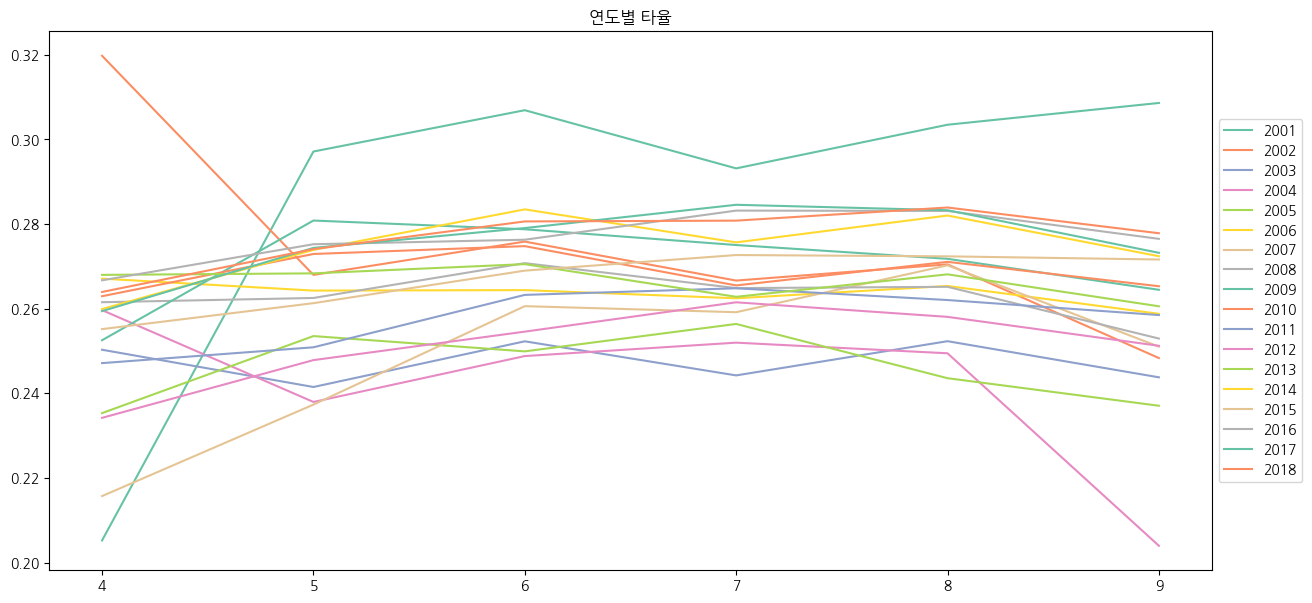

In [7]:
# 각 연도별 타율 변화

# nan이 존재하는 10월과 3월은 제외
display(month_avg_pivot.iloc[2:])

# 시각화
plt.figure(figsize=(15,7))
plt.plot(month_avg_pivot.iloc[2:])
plt.legend(month_avg_pivot.iloc[2:].columns.get_level_values(1), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('연도별 타율')
plt.show()